In [1]:
!pip3 install overpass

In [80]:
!pip3 install folium matplotlib mapclassify

     |████████████████████████████████| 95 kB 4.1 MB/s eta 0:00:011
  Using cached mapclassify-2.4.3-py3-none-any.whl (38 kB)


In [43]:
import overpass
import geopandas as gpd

In [3]:
api = overpass.API()

In [16]:
# Austin Administrative area (N.B. this explains why data stops before Cedar Park etc.)
# https://www.openstreetmap.org/relation/113314
AUSTIN_RELATION_ID=113314

In [36]:
query = f'''area({3600000000 + AUSTIN_RELATION_ID})->.a;
(
way(area.a)
["name"]
["highway"]
["highway" !~ "path"]
["highway" !~ "steps"]
["highway" !~ "motorway"]
["highway" !~ "motorway_link"]
["highway" !~ "raceway"]
["highway" !~ "bridleway"]
["highway" !~ "proposed"]
["highway" !~ "construction"]
["highway" !~ "elevator"]
["highway" !~ "bus_guideway"]
["highway" !~ "footway"]
["highway" !~ "cycleway"]
["foot" !~ "no"]
["access" !~ "private"]
["access" !~ "no"];
node(w)(area.a);
);
out;'''

response = api.get(query)

In [42]:
type(response)

geojson.feature.FeatureCollection

In [57]:
df = gpd.GeoDataFrame.from_features(response)

In [62]:
df.head()

,geometry,highway,traffic_signals,curve_geometry,traffic_signals:direction,disused:railway,source,noref,stop,direction,...,sidewalk:right:bicycle,status,rideshare,check_date,embankment,tunnel,turn,sidewalk:both:surface,landuse,construction
0,POINT (-97.79858 30.47117),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POINT (-97.79667 30.46911),traffic_signals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (-97.79767 30.46882),traffic_signals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POINT (-97.79914 30.47516),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,POINT (-97.79926 30.47276),traffic_signals,signal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

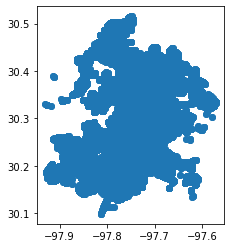

In [87]:
df.plot()